In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df=pd.read_csv('conversion_project.csv')
df = pd.read_csv('/content/drive/My Drive/Data/assignments/project03/conversion_project.csv')

In [ ]:
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [ ]:
df.isnull().sum()
#no missing value

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

# Check descriptive

In [ ]:
df['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [ ]:
df['source'].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [ ]:
df['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [ ]:
df['new_user'].value_counts()

1    216744
0     99456
Name: new_user, dtype: int64

In [ ]:
df['total_pages_visited'].value_counts()

2     43868
3     43829
4     41046
1     40739
5     36308
6     30261
7     23488
8     17522
9     12157
10     8074
11     5394
12     3615
13     2425
14     1811
15     1325
16     1100
17      845
18      722
19      565
20      405
21      296
22      180
23      113
24       46
25       39
26       17
27        7
29        2
28        1
Name: total_pages_visited, dtype: int64

check outliner

<AxesSubplot:>

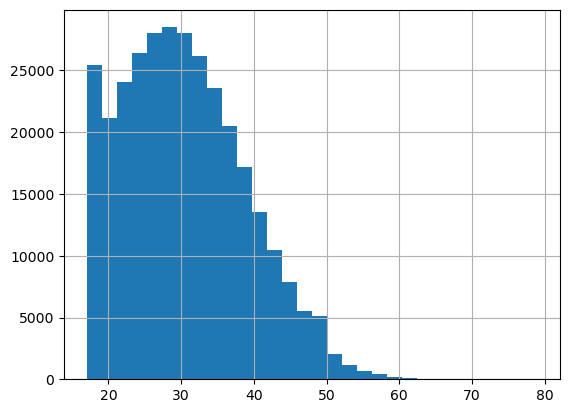

In [ ]:
df['age'].hist(bins=30)

In [ ]:
#sns.boxplot(df['age'])

In [ ]:
print(np.where(df['age']>100)) #two people' ages are older than 100.

(array([ 90928, 295581]),)


In [ ]:
df.drop(90928,inplace=True)

In [ ]:
df.drop(295581,inplace=True)

In [ ]:
#df['age'].value_counts()
df['age'].unique()

array([25, 23, 28, 39, 30, 31, 27, 29, 38, 43, 24, 36, 37, 33, 20, 35, 17,
       50, 22, 18, 34, 19, 42, 32, 21, 48, 40, 41, 26, 45, 44, 49, 46, 56,
       52, 54, 51, 47, 53, 60, 57, 55, 59, 61, 58, 62, 65, 63, 66, 67, 64,
       68, 69, 70, 73, 77, 72, 79])

In [ ]:
df=df.reset_index()

In [ ]:
df=df.drop(['index'],axis=1)

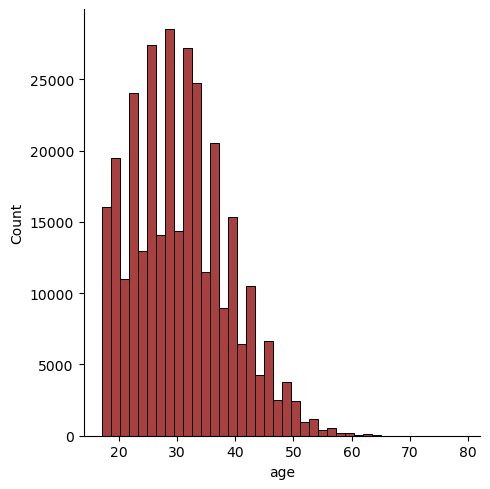

In [ ]:
sns.displot(df['age'],color='darkred',bins=40)

Check country

<AxesSubplot:xlabel='country', ylabel='count'>

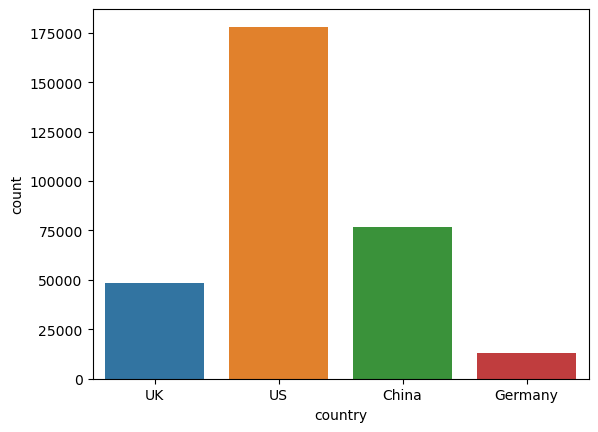

In [ ]:
sns.countplot(x='country',data=df)

<AxesSubplot:xlabel='source', ylabel='count'>

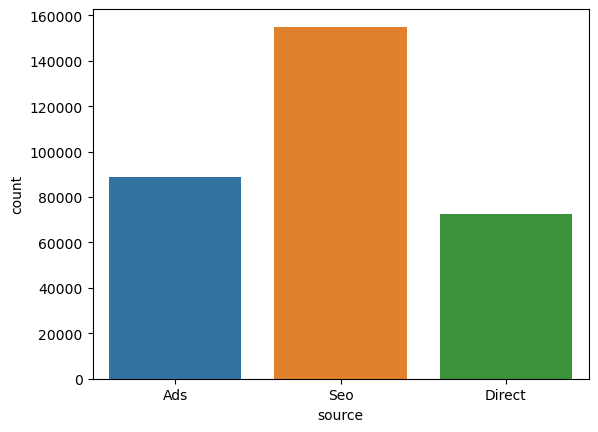

In [ ]:
sns.countplot(x='source',data=df)

In [ ]:
df['total_pages_visited'].describe()

count    316198.000000
mean          4.872918
std           3.341053
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          29.000000
Name: total_pages_visited, dtype: float64

<AxesSubplot:xlabel='total_pages_visited', ylabel='count'>

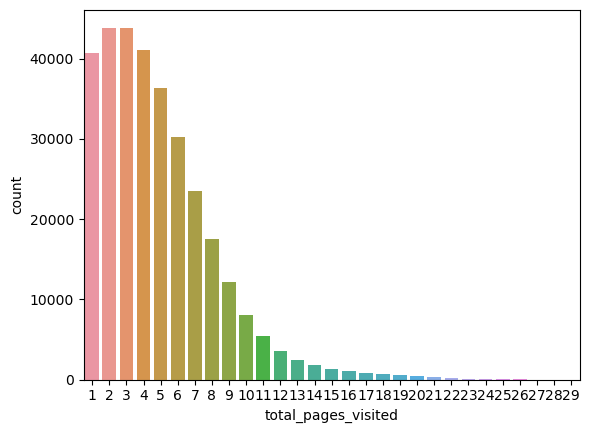

In [ ]:
sns.countplot(x='total_pages_visited',data=df)

<AxesSubplot:xlabel='new_user', ylabel='count'>

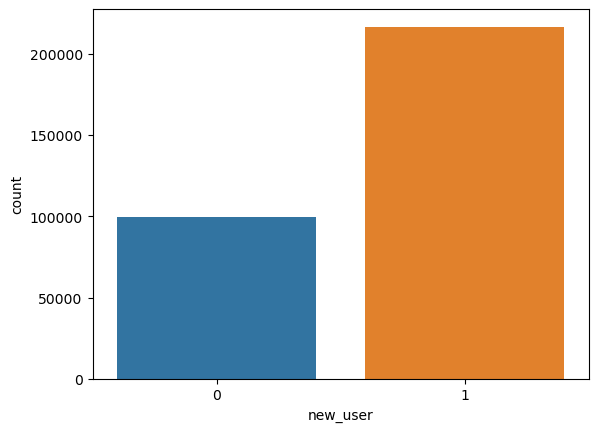

In [ ]:
sns.countplot(x='new_user',data=df)

<AxesSubplot:xlabel='converted', ylabel='count'>

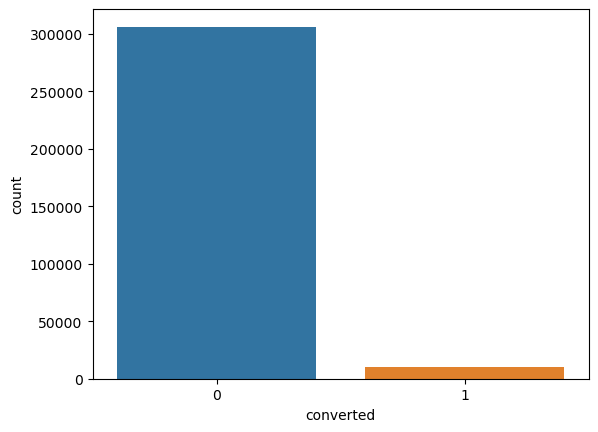

In [ ]:
sns.countplot(x='converted',data=df)

<AxesSubplot:xlabel='converted', ylabel='count'>

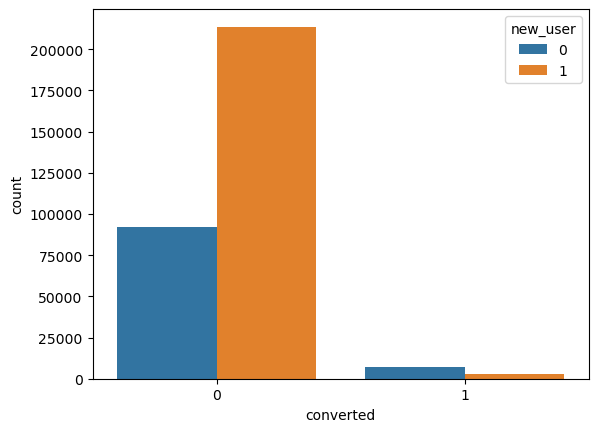

In [ ]:
sns.countplot(x='converted',hue='new_user',data=df)

In [ ]:
df.corr()['converted']

age                   -0.089199
new_user              -0.152338
total_pages_visited    0.528975
converted              1.000000
Name: converted, dtype: float64

In [ ]:
df.groupby('country')['converted'].mean()

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64

In [ ]:
df.groupby('new_user')['converted'].mean()

new_user
0    0.071983
1    0.014021
Name: converted, dtype: float64

In [ ]:
df.groupby('source')['converted'].mean()

source
Ads       0.034472
Direct    0.028169
Seo       0.032888
Name: converted, dtype: float64

### Calculate the conversion rate by age

In [ ]:
conversion_rate_by_age=df.groupby('age')['converted'].mean()

In [ ]:
pd.DataFrame(conversion_rate_by_age.reset_index())

,age,converted
0,17,0.071607
1,18,0.066029
2,19,0.058616
3,20,0.057109
4,21,0.053985
5,22,0.053243
6,23,0.047990
7,24,0.045448
8,25,0.038782
9,26,0.039767


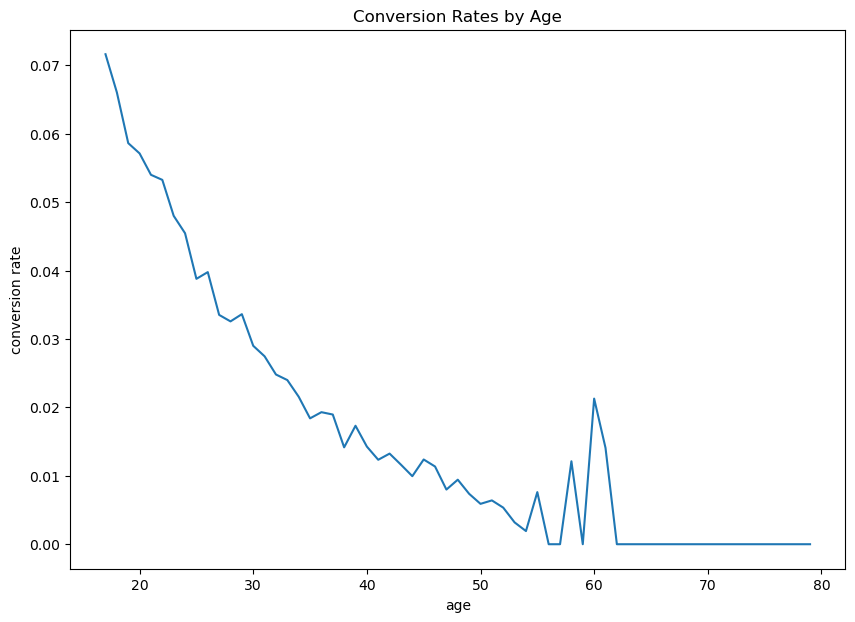

In [ ]:
ax=conversion_rate_by_age.plot(figsize=(10, 7),
    title='Conversion Rates by Age')
ax.set_xlabel('age')
ax.set_ylabel('conversion rate')
plt.show()

### generate age group

In [ ]:
def age_group_function(df):
  if df['age']>=70:
    return '[70,80]'
  elif (df['age']<70) and (df['age']>=60):
    return '[60,70]'
  elif (df['age'] <= 60) and (df['age'] >= 50):
    return '[50, 60]'
  elif (df['age'] <= 50) and (df['age'] >= 40):
    return '[40, 50]'
  elif (df['age'] <= 40) and (df['age'] >= 30):
    return '[30, 40]' 
  elif (df['age'] <= 30) and (df['age'] >= 20):
    return '[20, 30]'
  elif (df['age'] < 20):
    return '<20' 

df['age_group'] = df.apply(age_group_function, axis = 1)
df.head()

,country,age,new_user,source,total_pages_visited,converted,age_group
0,UK,25,1,Ads,1,0,"[20, 30]"
1,US,23,1,Seo,5,0,"[20, 30]"
2,US,28,1,Seo,4,0,"[20, 30]"
3,China,39,1,Seo,5,0,"[30, 40]"
4,US,30,1,Seo,6,0,"[30, 40]"


In [ ]:
df.groupby('age_group')['converted'].mean()

age_group
<20         0.064969
[20, 30]    0.042680
[30, 40]    0.022205
[40, 50]    0.011787
[50, 60]    0.004870
[60,70]     0.009288
[70,80]     0.000000
Name: converted, dtype: float64

In [ ]:
conversion_rate_by_age_group=df.groupby('age_group')['converted'].mean()
pd.DataFrame(conversion_rate_by_age_group.reset_index())

,age_group,converted
0,<20,0.064969
1,"[20, 30]",0.042680
2,"[30, 40]",0.022205
3,"[40, 50]",0.011787
4,"[50, 60]",0.004870
5,"[60,70]",0.009288
6,"[70,80]",0.000000


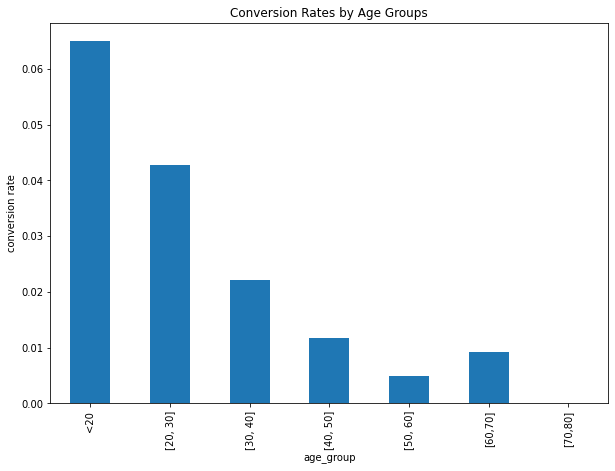

In [ ]:
ax=conversion_rate_by_age_group.plot(figsize=(10, 7),kind='bar',
    title='Conversion Rates by Age Groups')
ax.set_xlabel('age_group')
ax.set_ylabel('conversion rate')
plt.show()

In [ ]:
df.head()

,country,age,new_user,source,total_pages_visited,converted,age_group
0,UK,25,1,Ads,1,0,"[20, 30]"
1,US,23,1,Seo,5,0,"[20, 30]"
2,US,28,1,Seo,4,0,"[20, 30]"
3,China,39,1,Seo,5,0,"[30, 40]"
4,US,30,1,Seo,6,0,"[30, 40]"


In [ ]:
df.groupby(['age_group','country'])['converted'].mean().unstack('country')

country,China,Germany,UK,US
age_group,,,,
<20,0.002319,0.131041,0.104267,0.075539
"[20, 30]",0.001882,0.079925,0.069230,0.050053
"[30, 40]",0.000960,0.044618,0.036225,0.025985
"[40, 50]",0.000295,0.022063,0.019393,0.014028
"[50, 60]",0.000000,0.000000,0.008373,0.006399
"[60,70]",0.000000,0.000000,0.000000,0.016043
"[70,80]",NaN,NaN,0.000000,0.000000


## Converting Categorical Features 

In [ ]:
country_dum=pd.get_dummies(df['country'],drop_first=True)
age_dum=pd.get_dummies(df['age_group'],drop_first=True)
new_user_dum=pd.get_dummies(df['new_user'],drop_first=True)
source_dum=pd.get_dummies(df['source'],drop_first=True)

In [ ]:
train=df.copy()

In [ ]:
train.drop(['country','age','new_user','source','age_group'],axis=1,inplace=True)

In [ ]:
train=pd.concat([train,country_dum,age_dum,new_user_dum,source_dum],axis=1)
train.head()

,total_pages_visited,converted,Germany,UK,US,"[20, 30]","[30, 40]","[40, 50]","[50, 60]","[60,70]","[70,80]",1,Direct,Seo
0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
1,5,0,0,0,1,1,0,0,0,0,0,1,0,1
2,4,0,0,0,1,1,0,0,0,0,0,1,0,1
3,5,0,0,0,0,0,1,0,0,0,0,1,0,1
4,6,0,0,0,1,0,1,0,0,0,0,1,0,1


In [ ]:
train.rename(columns={1: "new_user"},inplace=True)

# Building a Logistic Regression model
## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('converted',axis=1), 
                                                    train['converted'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
y_train.sum()

7179

In [ ]:
y_train

184480    0
264374    0
29417     0
273141    0
19929     0
         ..
311895    0
136767    0
204614    0
214539    0
176991    0
Name: converted, Length: 221338, dtype: int64

## Training 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#logmodel=LogisticRegression(class_weight = 'balanced')
#logmodel=LogisticRegression()
logmodel = LogisticRegression( max_iter=10000)
log_fit=logmodel.fit(X_train,y_train)

In [ ]:
predictions=logmodel.predict(X_test)

## Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91841
           1       0.85      0.70      0.77      3019

    accuracy                           0.99     94860
   macro avg       0.92      0.85      0.88     94860
weighted avg       0.99      0.99      0.99     94860



In [ ]:
log_fit.coef_.ravel()

array([ 7.54145920e-01,  3.54216285e+00,  3.31775714e+00,  2.93492381e+00,
       -3.79897891e-01, -1.17513680e+00, -1.75032536e+00, -2.23837659e+00,
       -5.81841788e-01, -2.26253423e-03, -1.73010031e+00, -1.67636263e-01,
       -5.01989682e-02])

In [ ]:
log_fit_coef=pd.DataFrame({'coef':log_fit.coef_.ravel()},index=X_train.columns)
log_fit_coef.sort_values(by='coef',ascending=False,inplace=True)

In [ ]:
log_fit_coef

,coef
Germany,3.542163
UK,3.317757
US,2.934924
total_pages_visited,0.754146
"[70,80]",-0.002263
Seo,-0.050199
Direct,-0.167636
"[20, 30]",-0.379898
"[60,70]",-0.581842
"[30, 40]",-1.175137


# Random forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc_pred=rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91841
           1       0.85      0.68      0.76      3019

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.87     94860
weighted avg       0.99      0.99      0.99     94860



In [ ]:
rfc.feature_importances_

array([8.86108130e-01, 9.74990169e-03, 1.34744831e-02, 1.48454834e-02,
       4.88847236e-03, 7.75227256e-03, 7.60079368e-03, 2.54919144e-03,
       1.51479046e-04, 2.77676921e-07, 4.45668457e-02, 3.80617993e-03,
       4.50648908e-03])

In [ ]:
feat_imps=pd.DataFrame({'importance':rfc.feature_importances_},index=X_train.columns)
feat_imps.sort_values(by='importance',ascending=False,inplace=True)

In [ ]:
feat_imps

,importance
total_pages_visited,8.861081e-01
new_user,4.456685e-02
US,1.484548e-02
UK,1.347448e-02
Germany,9.749902e-03
"[30, 40]",7.752273e-03
"[40, 50]",7.600794e-03
"[20, 30]",4.888472e-03
Seo,4.506489e-03
Direct,3.806180e-03


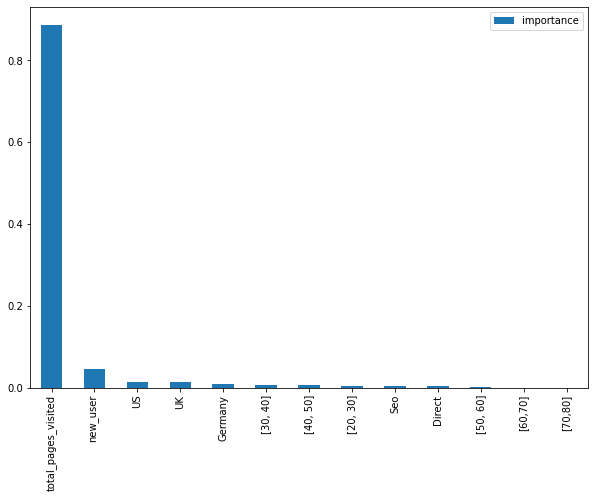

In [ ]:
feat_imps.plot(kind='bar',figsize=(10,7))

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree_pred=dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91841
           1       0.85      0.67      0.75      3019

    accuracy                           0.99     94860
   macro avg       0.92      0.83      0.87     94860
weighted avg       0.98      0.99      0.99     94860



In [ ]:
print(confusion_matrix(y_test,dtree_pred))

[[91482   359]
 [  986  2033]]


## True Visualizaion

In [ ]:
from IPython.display import Image  
#from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train.columns)
y_class=['non', 'converted']
features

['total_pages_visited',
 'Germany',
 'UK',
 'US',
 '[20, 30]',
 '[30, 40]',
 '[40, 50]',
 '[50, 60]',
 '[60,70]',
 '[70,80]',
 'new_user',
 'Direct',
 'Seo']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

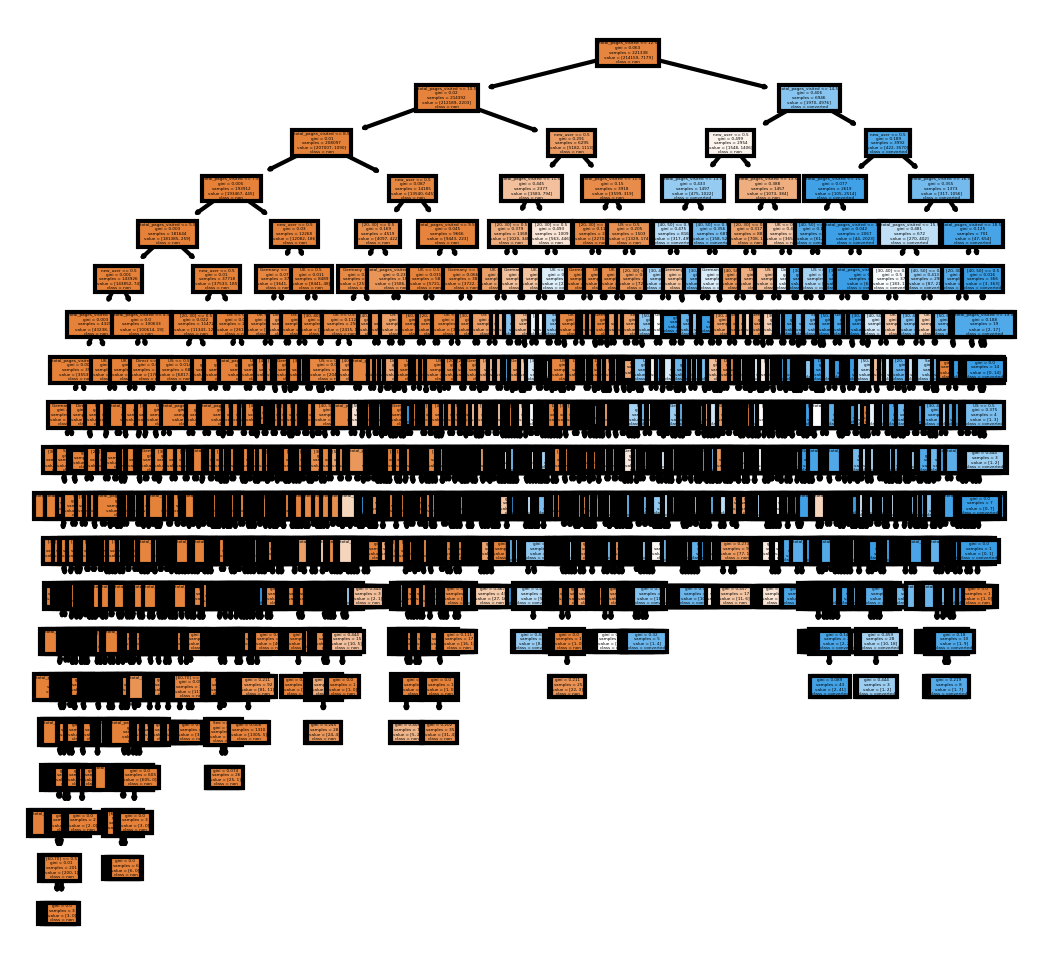

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree,
               feature_names = features, 
               class_names=y_class,
               filled = True);
fig.savefig('decisiontree.png')

In [ ]:
import graphviz

In [ ]:
dot_data=tree.export_graphviz(dtree,feature_names=features,class_names = y_class, filled=True,rounded=True)
graph=graphviz.Source(dot_data,format="png")
graph


Output hidden; open in https://colab.research.google.com to view.